# Red Wine Quality

### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
df = pd.read_csv("/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv")

## Task
Use machine learning to determine which physiochemical properties make a wine 'good'!  
P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties.
In Decision Support Systems, Elsevier, 47(4):547-553, 2009. 

In [2]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [3]:
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Visualizing the provided data

The qualitiy is the feature we want to predict, the target. So there are 11 different features that we need to inspect

NameError: name 'wine' is not defined

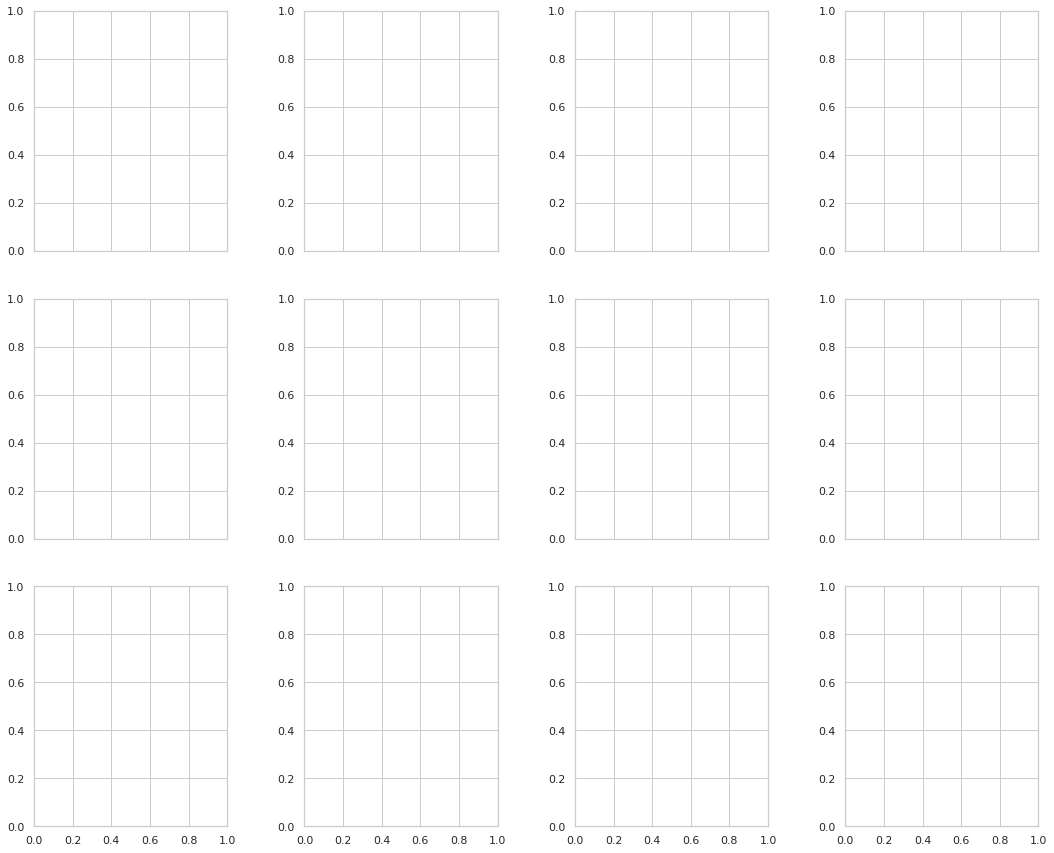

In [4]:
sns.set(style="whitegrid", color_codes=True, palette="Blues")

def create_plots(height, width, dataframe, target):
    # storing columnnames in a list
    columns = list(dataframe)
    count=0
    fig, axes = plt.subplots(height, width, sharex=True, sharey=False, figsize=(18,15))
    fig.subplots_adjust(wspace=.4)
    for i in range(height):
        for j in range(width):
            sns.barplot(x = target, y = columns[count], data = df, ax=axes[i, j])
            axes[i, j].title.set_text("{} vs. quality".format(columns[count]))
            count+=1

create_plots(3, 4, df, "quality")

In [ ]:
df.corr()

In [ ]:
correlation = df.corr()
#print(correlation)
ax = sns.heatmap(correlation)

## Linear Regression

### Linear Regression (OLS)

#### OLS with all features

In [ ]:
# generating targets and feautres
y = df.quality
#print(y)
X = df.drop("quality", axis=1)
#print(x)

In [ ]:
from sklearn.model_selection import train_test_split

#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100)
#checking the sizes
#print(X_train, X_test, y_train, y_test)
#print(len(X_train), len(X_test), len(y_train), len(y_test))

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_train, y_train)

In [ ]:
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.coef_))

In [ ]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

In [ ]:
y_pred = lr.predict(X_test)

plt.figure(figsize=(20,10)) 
plt.plot(range(len(y_pred)), y_pred, color="red", marker="^")
plt.plot(range(len(y_test)), y_test, color="green", marker="v")

#### OLS with selected features

In [ ]:
new_x = df[["citric acid", "chlorides", "sulphates", "alcohol", "volatile acidity"]]
new_y = df["quality"]

X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(new_x, new_y)

In [ ]:
from sklearn.linear_model import LinearRegression
new_lr = LinearRegression().fit(X_train_new, y_train_new)

print("Train set score: {:.2f}".format(new_lr.score(X_train_new, y_train_new)))
print("Test set score: {:.2f}".format(new_lr.score(X_test_new, y_test_new)))

In [ ]:
y_pred2 = new_lr.predict(X_test_new)

plt.figure(figsize=(20,10)) 
plt.plot(range(len(y_pred2)), np.round(y_pred), color="red", marker="^")
plt.plot(range(len(y_test)), y_test, color="green", marker="v")

### Ridge 

In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=10).fit(X_train, y_train)

print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

In [ ]:
train_score = []
test_score = []

for i in range(1, 100):
    ridge = Ridge(alpha=i).fit(X_train, y_train)
    train_score.append(ridge.score(X_train, y_train))
    test_score.append(ridge.score(X_test, y_test))

plt.plot(range(len(train_score)), train_score, color="black")
plt.plot(range(len(train_score)), test_score, color="red")

In [ ]:
train_score_new = []
test_score_new = []

print(np.linspace(0, 1, 11))

for i in np.linspace(0, 1, 11):
    print(i)
    ridge = Ridge(alpha=i).fit(X_train_new, y_train_new)
    train_score_new.append(ridge.score(X_train_new, y_train_new))
    test_score_new.append(ridge.score(X_test_new, y_test_new))

plt.plot(range(len(train_score_new)), train_score_new, color="black")
plt.plot(range(len(train_score_new)), test_score_new, color="red")

## k-nearest Neighbors

Splitting the dataset in good and bad wine.  
Good (1) is above 7 and above whereas the "bad" wines are labeled with 0.

In [ ]:
knn_data = pd.read_csv("/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv")
# Labeling 
knn_data["Target"] = [1 if row > 6 else 0 for row in knn_data["quality"]]

y = knn_data["Target"]
X = knn_data.drop(["quality", "Target"], axis=1)

ax = sns.barplot(x=y.unique(), y=y.value_counts(), palette="Blues_d")

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
#knn.predict(X_test)
print("Train accuracy: {}".format(knn.score(X_train, y_train)))
print("Test accuracy: {}".format(knn.score(X_test, y_test)))

In [ ]:
knn_train_score = []
knn_test_score = []

n_neighbors = range(1, 21)

for n in n_neighbors:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    knn_train_score.append(knn.score(X_train, y_train))
    knn_test_score.append(knn.score(X_test, y_test))
    
    
plt.figure(figsize=(20, 5))
plt.plot(n_neighbors, knn_test_score, color="black")
plt.plot(n_neighbors, knn_train_score, color="red")
plt.legend(["Test", "Train"], loc=6)
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.title("Number of Neighbors vs. Accuracy")